<a href="https://colab.research.google.com/github/smartinternz02/SI-GuidedProject-581557-1694628549/blob/main/Assignment_4_Mohamed_Irfan_Wine_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Grapes to Greatness: Machine Learning in Wine Quality Prediction**


## **Mohamed Irfan**

In [625]:
import pandas as pd
import matplotlib.pyplot as pl
from matplotlib import RcParams
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [626]:
df = pd.read_csv('/content/winequality-red.csv')
pd.set_option('display.max_colwidth', None)
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [627]:
df.shape

(1599, 12)

In [628]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [629]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [630]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


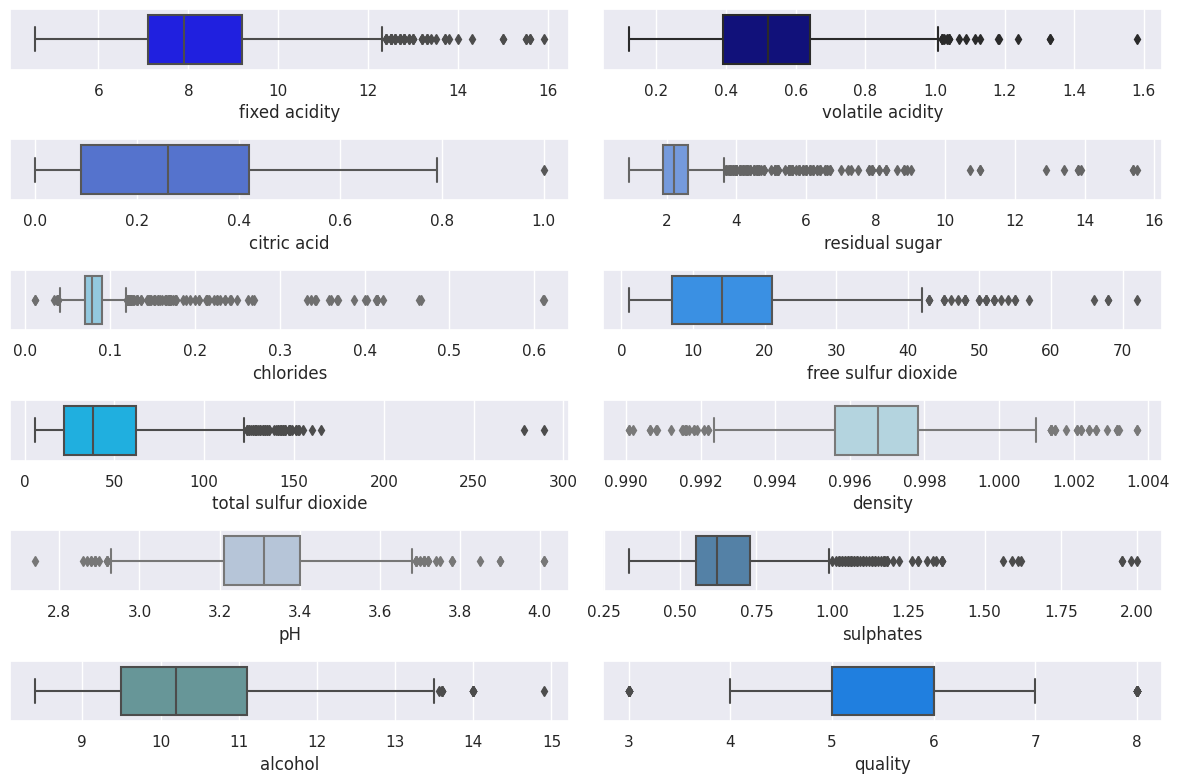

In [631]:
pl.figure(figsize=(12, 8))
colors = ["#0000FF", "#00008B", "#4169E1", "#6495ED", "#87CEEB", "#1E90FF", "#00BFFF", "#ADD8E6", "#B0C4DE", "#4682B4", "#5F9EA0", "#007FFF"]
c=0
for i, feature in enumerate(df.columns):
    pl.subplot(6, 2, i+1)
    sns.boxplot(x=df[feature], color = colors[c])
    c+=1

pl.tight_layout()
pl.show()

### **Treating Outliers in the data**

In [632]:
def outlier(column):
  q1 = df[column].quantile(0.25)
  q3 = df[column].quantile(0.75)

  IQR = q3 - q1

  upper_limit = q3 + 1.5 * IQR
  lower_limit = q1 - 1.5 * IQR

  df.loc[df[column] > upper_limit, column] = df[column].median()
  df.loc[df[column] < lower_limit, column] = df[column].median()

The Wine quality column is not treated for any outliers

In [633]:
for column in df.iloc[:,:-1].columns:
  outlier(column)

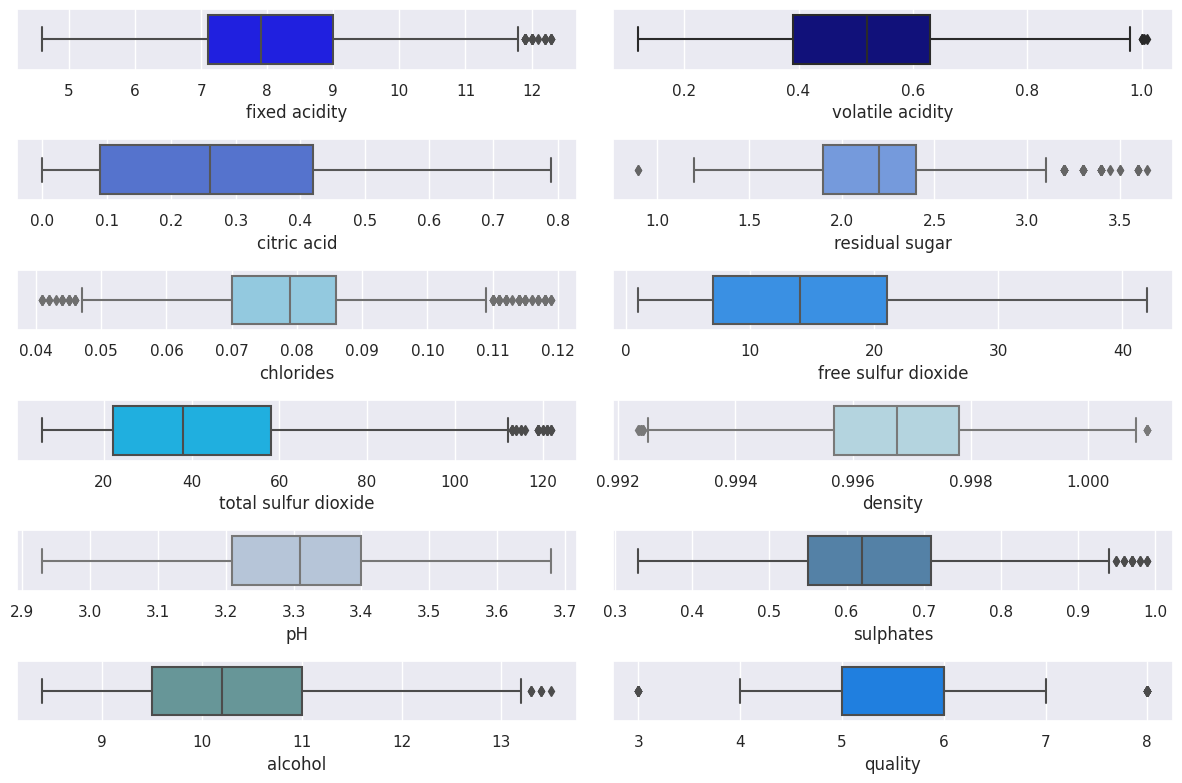

In [634]:
pl.figure(figsize=(12, 8))
colors = ["#0000FF", "#00008B", "#4169E1", "#6495ED", "#87CEEB", "#1E90FF", "#00BFFF", "#ADD8E6", "#B0C4DE", "#4682B4", "#5F9EA0", "#007FFF"]
c=0
for i, feature in enumerate(df.columns):
    pl.subplot(6, 2, i+1)
    sns.boxplot(x=df[feature], color = colors[c])
    c+=1

pl.tight_layout()
pl.show()

In [635]:
print('Quality of Wines :', df['quality'].unique())

Quality of Wines : [5 6 7 4 8 3]


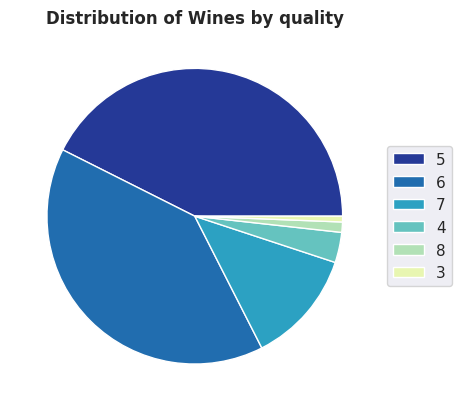

In [636]:
sns.set_palette('YlGnBu_r')

pl.pie(df['quality'].value_counts(), labels=None)  # Hide labels
pl.title("Distribution of Wines by quality", fontweight='bold')

pl.legend(df['quality'].value_counts().index, loc="center left", bbox_to_anchor=(1, 0.5))

pl.show()
sns.set()

### **Feature Extraction**

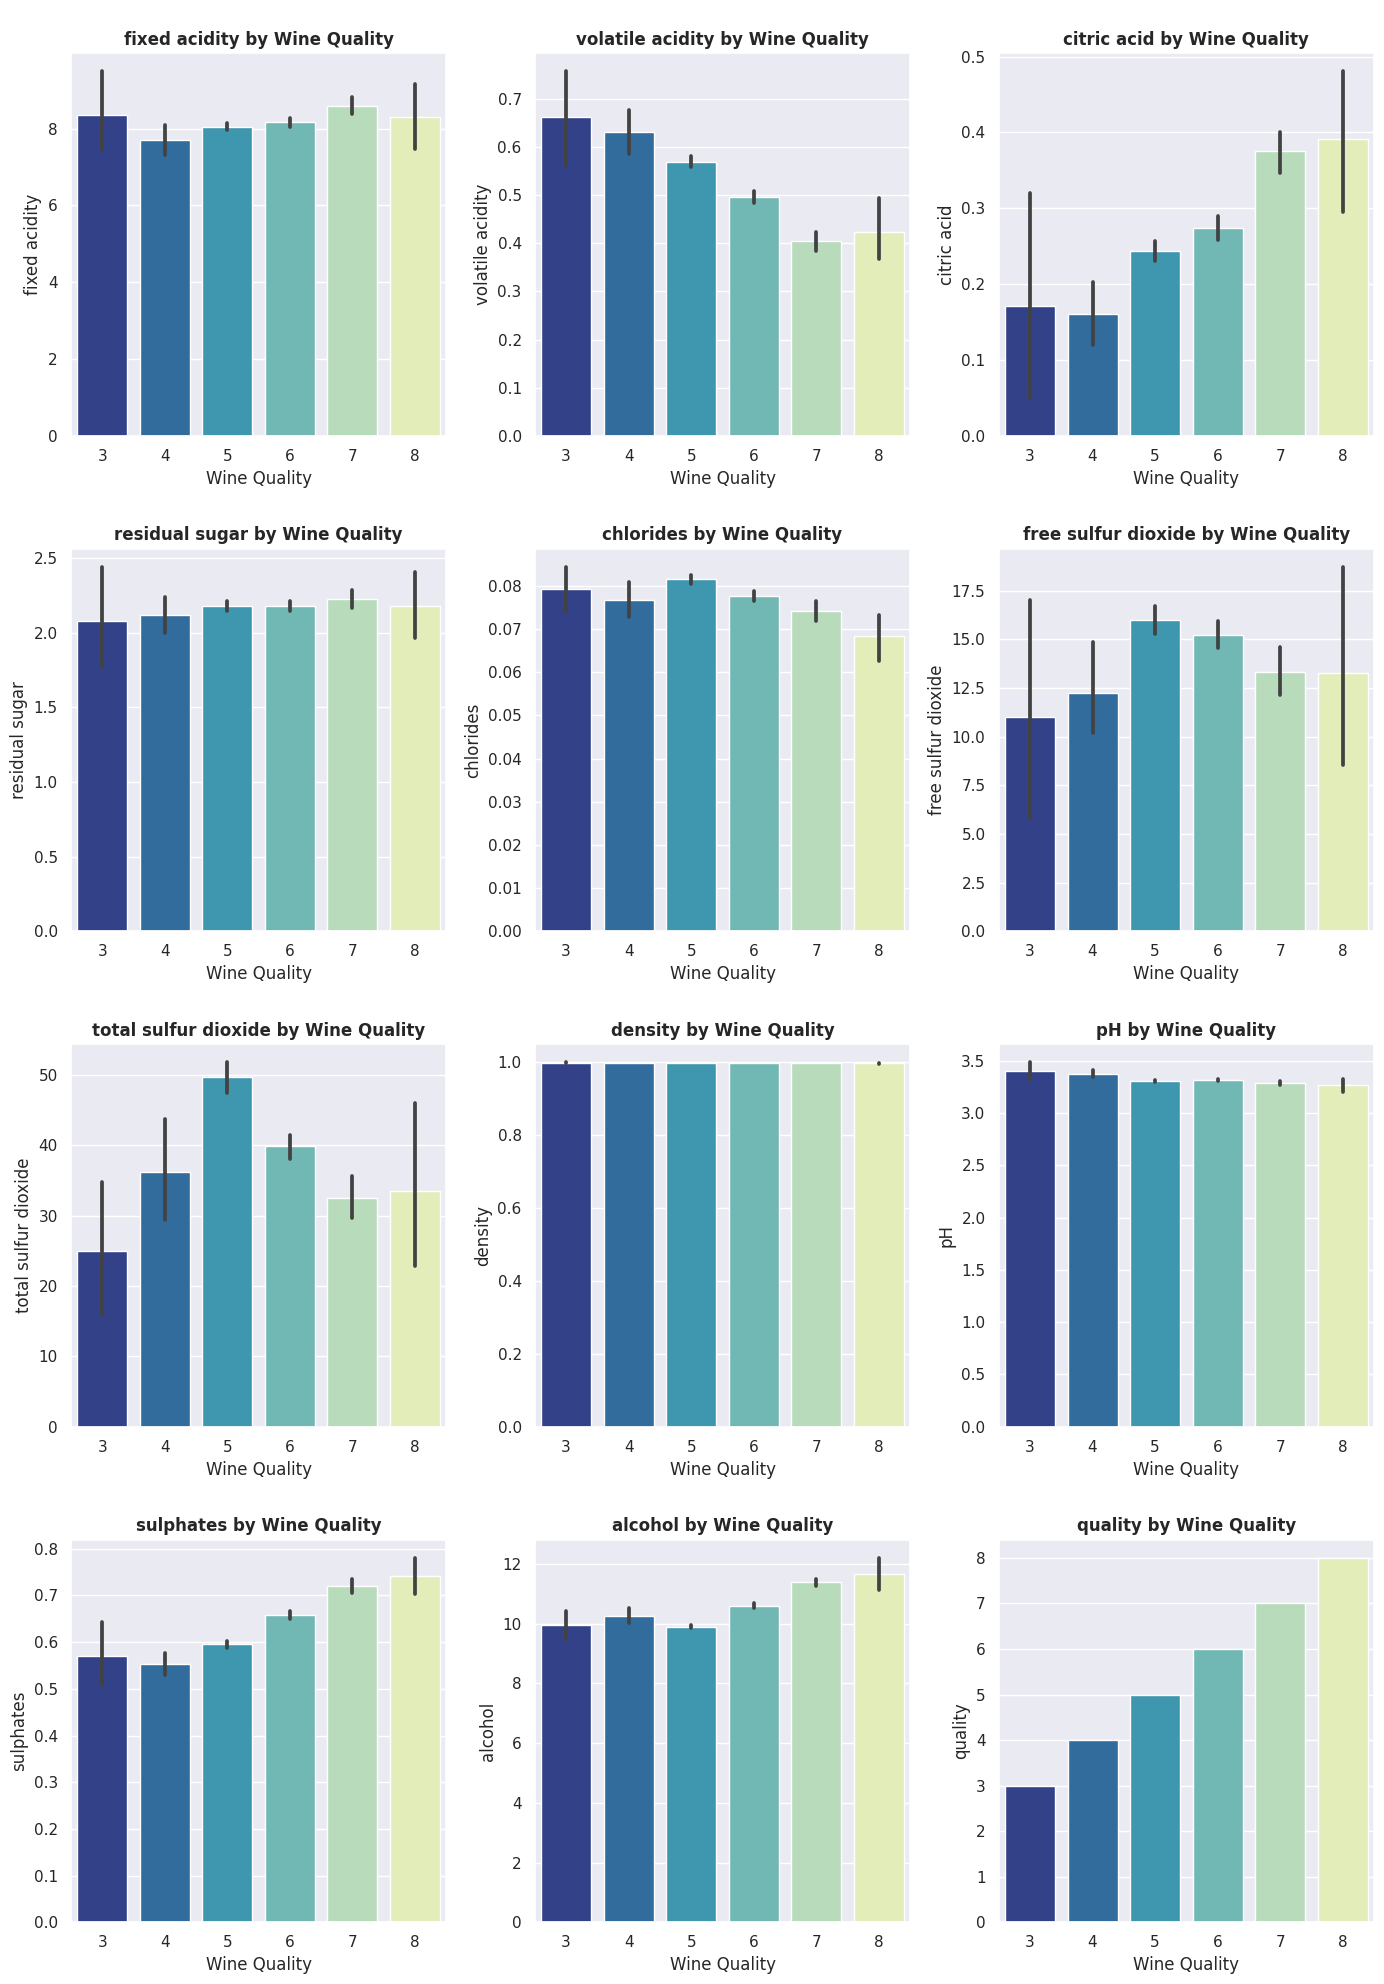

In [637]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette('YlGnBu_r')

features_to_plot = df.columns.values
print()

plt.figure(figsize=(14, 20))

for i, feature in enumerate(features_to_plot):
    plt.subplot(4, 3, i + 1)

    sns.barplot(x=df['quality'], y=df[feature])

    plt.xlabel('Wine Quality')
    plt.ylabel(feature)
    plt.title(f'\n{feature} by Wine Quality', fontweight='bold')

sns.set()
plt.tight_layout()

plt.show()


### **Observations:**

*   The features fixed acidity and residual sugar might not give any be useful in predicting/classifying the quality of wine.

*   Quality of wine increases with
>increase in citric acid.
<br>increase in alcohol.
<br>increase in sulphates.
<br>decrease in chlorides.
<br>decrease in pH
<br>decrease in volatile acidity


*   Free sulfur dioxide alone will not be able to predict the quality.
*   Total sulfur dioxide alone will not be able to predict the quality.

<Axes: >

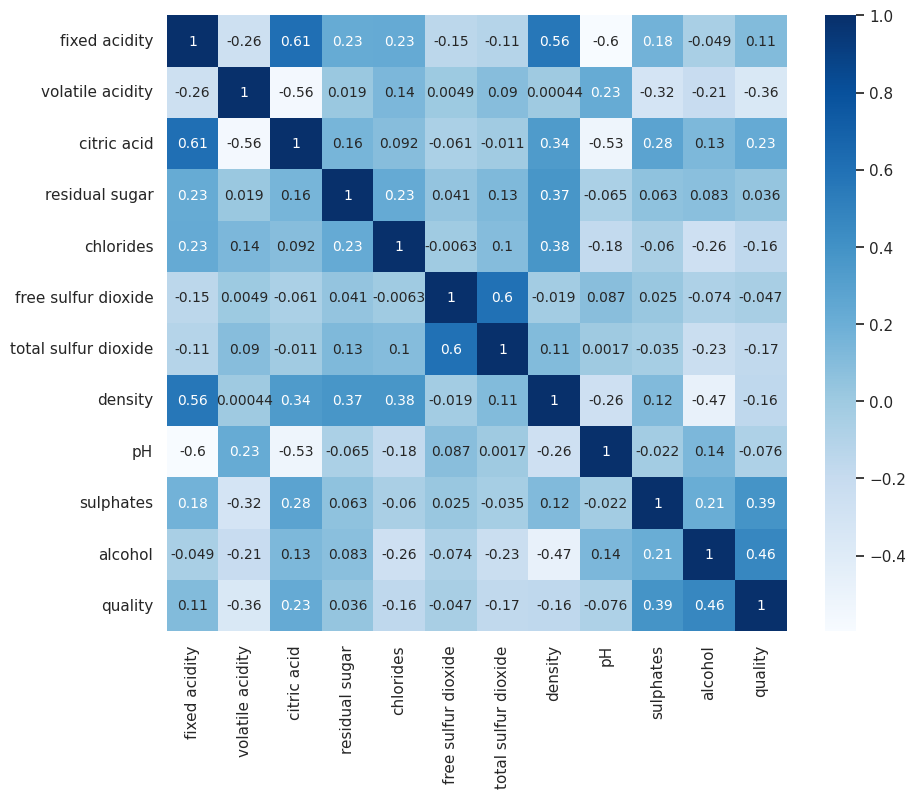

In [638]:
pl.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot = True, cmap = 'Blues',annot_kws={"size": 10})

In [639]:
df.corr().quality.sort_values(ascending = False)

quality                 1.000000
alcohol                 0.464152
sulphates               0.385729
citric acid             0.232209
fixed acidity           0.109637
residual sugar          0.035506
free sulfur dioxide    -0.047187
pH                     -0.075837
chlorides              -0.162122
density                -0.164179
total sulfur dioxide   -0.168010
volatile acidity       -0.356247
Name: quality, dtype: float64


### **Observations:**

1.   The columns alcohol, sulphates, citric acid and fixed acidity are positively correlated to wine quality
2.   chlorides, density, total sulfur dioxide and volatile acidity are negatively correlated to wine quality



In [640]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### **Splitting into dependent and independent variables**

In [641]:
X_unscaled = df.iloc[:,:-1]
Y = df.iloc[:,-1]

## **Scaling**

In [642]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [643]:
X = pd.DataFrame(scaler.fit_transform(X_unscaled), columns = X_unscaled.columns)

In [644]:
X.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.506257,1.084072,-1.395226,-0.660402,-0.193503,-0.455657,-0.329932,0.648369,1.448448,-0.638601,-0.976125
1,-0.237876,2.171450,-1.395226,0.980050,1.341692,1.076386,0.903736,0.039563,-0.783248,0.372245,-0.582843


### **Train Test Split**

In [645]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size = 0.2,random_state=0)

In [646]:
X_train.shape , X_test.shape , Y_train.shape , Y_test.shape

((1279, 11), (320, 11), (1279,), (320,))

## **Machine Learning**

In [647]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### **Logistic Regression**

In [648]:
LR = LogisticRegression(solver='lbfgs', random_state=0, max_iter=1000)

LR.fit(X_train, Y_train)
Y_pred_LR = LR.predict(X_test)
#Y_compare_LR = pd.DataFrame({'Actual' : Y_test, 'Predicted' : Y_pred_LR})
#print(Y_compare_LR.head())
#print('\nConfusion matrix:')
#print(confusion_matrix(Y_test, Y_pred_LR))
print(classification_report(Y_test, Y_pred_LR))
print()


Y_predict_train_LR = knn.predict(X_train)

print('Testing Accuracy = ', accuracy_score(Y_test, Y_pred_LR))
print('Training Accuracy = ', accuracy_score(Y_train, Y_predict_train_LR))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.65      0.78      0.71       135
           6       0.62      0.58      0.60       142
           7       0.31      0.30      0.30        27
           8       0.00      0.00      0.00         3

    accuracy                           0.61       320
   macro avg       0.26      0.28      0.27       320
weighted avg       0.58      0.61      0.59       320


Testing Accuracy =  0.6125
Training Accuracy =  0.6794370602032838


### **K-Nearest Neighbours**

In [649]:
knn = KNN(n_neighbors=6, metric='euclidean', p=2)
knn.fit(X_train, Y_train)
Y_pred_knn = knn.predict(X_test)
Y_compare_knn = pd.DataFrame({'Actual' : Y_test, 'Predicted' : Y_pred_knn})
#print(Y_compare_knn.head())
#print('\nConfusion matrix:')
#print(confusion_matrix(Y_test, Y_pred_knn))
print(classification_report(Y_test, Y_pred_knn))
print()


Y_predict_train_knn = knn.predict(X_train)

print('Testing Accuracy = ', accuracy_score(Y_test, Y_pred_knn))
print('Training Accuracy = ', accuracy_score(Y_train, Y_predict_train_knn))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.61      0.70      0.65       135
           6       0.59      0.54      0.56       142
           7       0.41      0.52      0.46        27
           8       0.00      0.00      0.00         3

    accuracy                           0.58       320
   macro avg       0.27      0.29      0.28       320
weighted avg       0.55      0.58      0.56       320


Testing Accuracy =  0.578125
Training Accuracy =  0.6794370602032838


### **Decision Tree Classifier**

In [650]:
DTC = DecisionTreeClassifier(max_depth=4,splitter='best',criterion='entropy')
DTC.fit(X_train, Y_train)
Y_pred_dtc = DTC.predict(X_test)

#print('Testing Accuracy = ', accuracy_score(Y_test,Y_pred_dtc))
#print('Training Accuracy = ', accuracy_score(Y_train,d_y_predict_train))
print(classification_report(Y_test,Y_pred_dtc))

Y_predict_train_dtc = DTC.predict(X_train)

print('Testing Accuracy = ', accuracy_score(Y_test, Y_pred_dtc))
print('Training Accuracy = ', accuracy_score(Y_train, Y_predict_train_dtc))


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.62      0.73      0.67       135
           6       0.56      0.49      0.52       142
           7       0.26      0.37      0.31        27
           8       0.00      0.00      0.00         3

    accuracy                           0.56       320
   macro avg       0.24      0.26      0.25       320
weighted avg       0.53      0.56      0.54       320

Testing Accuracy =  0.55625
Training Accuracy =  0.6239249413604379


### **Random Forest Classifier**

In [651]:
rfc = RFC(n_estimators=370, criterion='gini', random_state=105)
rfc.fit(X_train, Y_train)
Y_pred_rfc = rfc.predict(X_test)
Y_compare_rfc = pd.DataFrame({'Actual' : Y_test, 'Predicted' : Y_pred_rfc})
#print(Y_compare_rfc.head())
#print('\nConfusion matrix:')
#print(confusion_matrix(Y_test, Y_pred_rfc))
print(classification_report(Y_test, Y_pred_rfc))
print()

Y_predict_train_rfc = rfc.predict(X_train)

print('Testing Accuracy = ', accuracy_score(Y_test, Y_pred_rfc))
print('Training Accuracy = ', accuracy_score(Y_train, Y_predict_train_rfc))



              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.79      0.85      0.82       135
           6       0.76      0.77      0.76       142
           7       0.52      0.56      0.54        27
           8       0.00      0.00      0.00         3

    accuracy                           0.75       320
   macro avg       0.34      0.36      0.35       320
weighted avg       0.71      0.75      0.73       320


Testing Accuracy =  0.746875
Training Accuracy =  1.0


In [652]:
modelNames = ['Logistic Regression', 'K-Nearest Neighbours', 'Decision Tree', 'Random Forest']
modelClassifiers = [LR, knn, DTC, rfc]
models = pd.DataFrame({'modelNames' : modelNames, 'modelClassifiers' : modelClassifiers})
counter=0
score=[]
for i in models['modelClassifiers']:
  accuracy = cross_val_score(i, X_train, Y_train, scoring='accuracy', cv=10)
  print('Accuracy of %s Classification model is %.2f' %(models.iloc[counter,0],accuracy.mean()))
  score.append(accuracy.mean())
  counter+=1

Accuracy of Logistic Regression Classification model is 0.57
Accuracy of K-Nearest Neighbours Classification model is 0.56
Accuracy of Decision Tree Classification model is 0.56
Accuracy of Random Forest Classification model is 0.68


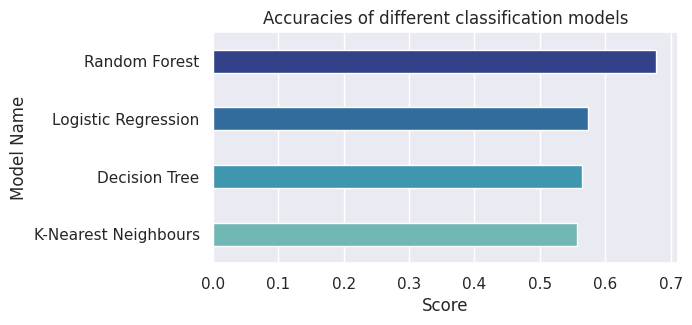

In [653]:
acc = pd.DataFrame({'Model Name' : modelNames,'Score' : score}).sort_values(by='Score', ascending=False)
sns.set_palette('YlGnBu_r')
pl.figure(figsize=(6, 3))
sns.barplot(y=acc['Model Name'], x=acc['Score'], orient='h', width=0.4)
pl.title('Accuracies of different classification models')
sns.set()
plt.show()

### **Ridge Regression**

In [654]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


ridge = Ridge(alpha=1.0)
ridge.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = ridge.predict(X_test)

# Calculate metrics
mse = mean_squared_error(Y_test, Y_pred)
rmse = mse ** 0.5
r2 = r2_score(Y_test, Y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)


Mean Squared Error (MSE): 0.38240826103440073
Root Mean Squared Error (RMSE): 0.6183916728372082
R-squared (R2) Score: 0.33199239287064763


### **Observation**
The **Random Forest Classification** model is the best model for classifying wine quality with a Testing Accuracy of  **0.75** and a Training Accuracy of **1.0**.

### **Testing with random observations**

In [655]:
sample = df[ (df['quality'] == 7)].sample()
sample_list = sample.iloc[:, :-1].values.tolist()
print('Actual quality :', sample['quality'].values)
print()
# Define the models and their names in a list of tuples
models = [
    ('Logistic Regression', LR),
    ('K-Nearest Neighbors', knn),
    ('Decision Tree Classifier', DTC),
    ('Random Forest Classifier', rfc),
    ('Ridge Regression',ridge)]

# Iterate through the models and print predictions
for model_name, model in models:
    predictions = model.predict(sample_list)
    print(f"{model_name} Predictions: {predictions}")


Actual quality : [7]

Logistic Regression Predictions: [7]
K-Nearest Neighbors Predictions: [6]
Decision Tree Classifier Predictions: [6]
Random Forest Classifier Predictions: [6]
Ridge Regression Predictions: [7.78876172]


In [657]:
sample = df[(df['fixed acidity'] == 6.5) & (df['quality'] == 6)].sample()
sample_list = sample.iloc[:, :-1].values.tolist()
print('Actual quality :', sample['quality'].values)
print()
# Define the models and their names in a list of tuples
models = [
    ('Logistic Regression', LR),
    ('K-Nearest Neighbors', knn),
    ('Decision Tree Classifier', DTC),
    ('Random Forest Classifier', rfc),
    ('Ridge Regression',ridge)]


# Iterate through the models and print predictions
for model_name, model in models:
    predictions = model.predict(sample_list)
    print(f"{model_name} Predictions: {predictions}")


Actual quality : [6]

Logistic Regression Predictions: [5]
K-Nearest Neighbors Predictions: [5]
Decision Tree Classifier Predictions: [6]
Random Forest Classifier Predictions: [6]
Ridge Regression Predictions: [6.35326791]


In [658]:
sample = df[df['quality'] == 5].sample()
sample_list = sample.iloc[:, :-1].values.tolist()
print('Actual quality :', sample['quality'].values)
print()
# Define the models and their names in a list of tuples
models = [
    ('Logistic Regression', LR),
    ('K-Nearest Neighbors', knn),
    ('Decision Tree Classifier', DTC),
    ('Random Forest Classifier', rfc),
    ('Ridge Regression',ridge)]


# Iterate through the models and print predictions
for model_name, model in models:
    predictions = model.predict(sample_list)
    print(f"{model_name} Predictions: {predictions}")


Actual quality : [5]

Logistic Regression Predictions: [5]
K-Nearest Neighbors Predictions: [5]
Decision Tree Classifier Predictions: [6]
Random Forest Classifier Predictions: [6]
Ridge Regression Predictions: [6.12489446]


### **Conclusions**

It can be concluded that the Random Forest Classifier performs the best, among the other studied models.